In [51]:

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


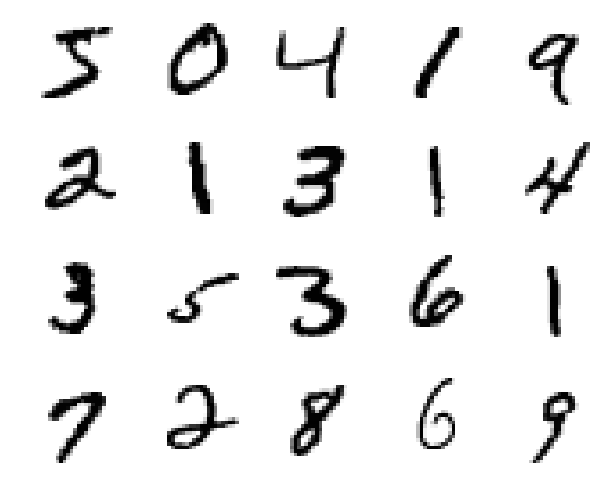

In [58]:
plt.figure(figsize=(8, 8))

for i in range(20):
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    plt.subplot(5, 5, i + 1)
    #im = X_train[i].reshape((28,28))
    im = 1 - X_train[i].reshape((28,28))
    plt.axis('off')
    plt.imshow(im, cmap='gray')

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
          
rms = RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total para

In [17]:
hdf5_file="./mnist-cnn-model3.hdf5"


if os.path.exists(hdf5_file):
    model.load_weights(hdf5_file)
else:
    h = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=100, epochs=3, shuffle=True)
    model.save_weights(hdf5_file)

In [127]:
print(model.layers[0].get_weights()[0].shape[3]) # Convolution2D
print(model.layers[5].get_weights()[0].shape) # Dense

32
(6272, 10)


In [18]:
score = model.evaluate(X_test, Y_test, batch_size=100)

 9800/10000 [============================>.] - ETA: 0s

In [19]:
print(score[0], score[1])

0.0534754661273 0.983300005198


In [20]:
y_hat = model.predict_classes(X_test)

 9856/10000 [============================>.] - ETA: 0s

In [21]:
test_wrong = [im for im in zip(X_test,y_hat,y_test) if im[1] != im[2]]
test_true = [im for im in zip(X_test,y_hat,y_test) if im[1] == im[2]]
print(len(test_wrong))
print(len(test_true))

167
9833


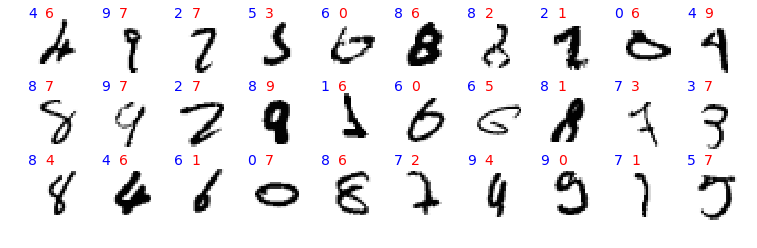

In [27]:
plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:30]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')

In [12]:
print(model.layers[0].get_weights()[0].shape) # the weights

(3, 3, 1, 32)


(3, 3, 1, 32)
(32, 1, 3, 3)


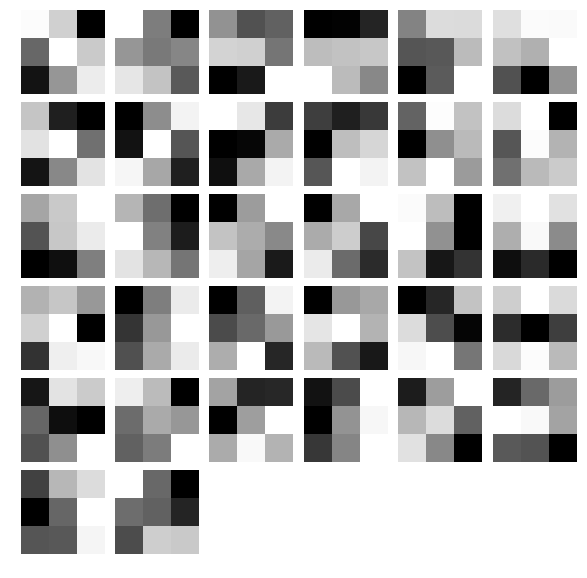

In [32]:
from keras import backend as K

W = model.layers[0].get_weights()[0]


print(W.shape)
if K.image_dim_ordering() == 'tf':
    # (nb_filter, nb_channel, nb_row, nb_col)
    W = W.transpose(3, 2, 0, 1)
    nb_filter, nb_channel, nb_row, nb_col = W.shape
    print(W.shape)


#plt.figure()
plt.figure(figsize=(10, 10), frameon=False)
for i in range(32):
        im = W[i][0]
        plt.subplot(6, 6, i + 1)
        plt.axis('off')
        #print(im)
        plt.imshow(im, cmap='gray')
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()